## Install python autotime untuk menghitung waktu eksekusi

In [23]:
!pip install ipython-autotime
%load_ext autotime

time: 158 µs (started: 2020-12-29 11:07:11 +00:00)


## Mendowload dataset

In [61]:
!wget https://raw.githubusercontent.com/Daffa404/KKB_Tugas/master/Tugas_1/data.csv

--2020-12-29 11:50:22--  https://raw.githubusercontent.com/Daffa404/KKB_Tugas/master/Tugas_1/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1.41M  --.-KB/s    in 0.09s   

2020-12-29 11:50:23 (16.4 MB/s) - ‘data.csv.1’ saved [1475504/1475504]

time: 427 ms (started: 2020-12-29 11:50:22 +00:00)


## Import

In [105]:
# Util
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.optimizers import Adam # Optimizer Adam
from keras.optimizers import SGD # Optimizer SGD
from keras.optimizers import Ftrl # Optimizer Ftrl
from keras.optimizers import RMSprop # Optimizer RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import EarlyStopping

# Visualisasi
import matplotlib.pyplot as plt

# Count Runtime
import time

time: 6.4 ms (started: 2020-12-29 12:57:23 +00:00)


## Persiapan Data Train dan Test

Meng-import file csv


In [106]:
df = pd.read_csv('data.csv')


time: 40.8 ms (started: 2020-12-29 12:57:26 +00:00)


Menampilkan data csv

In [107]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


time: 36.8 ms (started: 2020-12-29 12:57:30 +00:00)


Mengambil hanya kolom yang bertipe numerik saja

In [108]:
numeric = []
for col in df.drop(columns=['Year','Number of Doors']).columns:
  print(df[col].dtypes)
  if df[col].dtypes != 'object':
    numeric.append(col)
numeric

object
object
object
float64
float64
object
object
object
object
object
int64
int64
int64
int64


['Engine HP',
 'Engine Cylinders',
 'highway MPG',
 'city mpg',
 'Popularity',
 'MSRP']

time: 8.07 ms (started: 2020-12-29 12:57:34 +00:00)


Pada target (MSRP) diubah menjadi kategorikal (cheap & expensive), kemudian diubah menjadi numerik diskrit (0: cheap & 1: expensive)

In [109]:
df_num = df[numeric]
df_num['MSRP'] = pd.qcut(df_num['MSRP'], 2, labels=['cheap', 'expensive'])
df_num['MSRP'].replace({'cheap': 0, 'expensive': 1}, inplace=True)
df_num.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity,MSRP
0,335.0,6.0,26,19,3916,1
1,300.0,6.0,28,19,3916,1
2,300.0,6.0,28,20,3916,1
3,230.0,6.0,28,18,3916,0
4,230.0,6.0,28,18,3916,1


time: 32.7 ms (started: 2020-12-29 12:57:39 +00:00)


Menghilangkan baris yang memiliki missing value

In [110]:
df_num.dropna(inplace=True)

time: 7.17 ms (started: 2020-12-29 12:57:41 +00:00)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Membagi data menjadi fitur (X) dan target (y)

In [111]:
X, y = df_num.drop(columns=['MSRP']), df_num['MSRP']
X

,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity
0,335.0,6.0,26,19,3916
1,300.0,6.0,28,19,3916
2,300.0,6.0,28,20,3916
3,230.0,6.0,28,18,3916
4,230.0,6.0,28,18,3916
...,...,...,...,...,...
11909,300.0,6.0,23,16,204
11910,300.0,6.0,23,16,204
11911,300.0,6.0,23,16,204
11912,300.0,6.0,23,16,204


time: 22 ms (started: 2020-12-29 12:57:44 +00:00)


Melakukan normalisasi pada setiap fitur

In [112]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.29598309, 0.375     , 0.04093567, 0.09230769, 0.69213086],
       [0.2589852 , 0.375     , 0.04678363, 0.09230769, 0.69213086],
       [0.2589852 , 0.375     , 0.04678363, 0.1       , 0.69213086],
       ...,
       [0.2589852 , 0.375     , 0.03216374, 0.06923077, 0.0357206 ],
       [0.2589852 , 0.375     , 0.03216374, 0.06923077, 0.0357206 ],
       [0.17547569, 0.375     , 0.04093567, 0.07692308, 0.01043324]])

time: 8.57 ms (started: 2020-12-29 12:57:49 +00:00)


Membagi data menjadi train dan test

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.7, random_state=42)
print(len(X_train), len(y_train), len(X_test), len(y_test))

3544 3544 8272 8272
time: 7.83 ms (started: 2020-12-29 13:24:46 +00:00)


Mengubah dataframe menjadi 3 dimensi

In [162]:
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_train_reshaped.shape[1:3]

(5, 1)

time: 3.49 ms (started: 2020-12-29 13:24:48 +00:00)


In [163]:
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_test_reshaped.shape

(8272, 5, 1)

time: 2.69 ms (started: 2020-12-29 13:24:51 +00:00)


Menambahkan conv layer 1, conv layer 2, dan output layer pada CNN

In [164]:
model = Sequential()

# Hidden Layer 1
model.add(Conv1D(32, 4, input_shape=X_train_reshaped.shape[1:3], activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling1D(1))

# Hidden Layer 2
model.add(Conv1D(16, 2, activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling1D(1))

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_28 (Conv1D)           (None, 2, 32)             160       
_________________________________________________________________
dropout_28 (Dropout)         (None, 2, 32)             0         
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 2, 32)             0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 1, 16)             1040      
_________________________________________________________________
dropout_29 (Dropout)         (None, 1, 16)             0         
_________________________________________________________________
max_pooling1d_29 (MaxPooling (None, 1, 16)             0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 16)              

## Optimizer

Kami menyediakan beberapa pilihan optimizer, Silahkan di run salah satu

Menggunakan SGD optimizer

In [130]:
optimizer = SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD")

time: 1.22 ms (started: 2020-12-29 13:03:32 +00:00)


Menggunakan Adam optimizer

In [118]:
optimizer = Adam(learning_rate=0.01, name="Adam")

time: 1.08 ms (started: 2020-12-29 12:58:04 +00:00)


Menggunkan Ftrl optimizer

In [165]:
optimizer = Ftrl(
    learning_rate=0.01,
    learning_rate_power=-0.5,
    initial_accumulator_value=0.1,
    l1_regularization_strength=0.0,
    l2_regularization_strength=0.0,
    name="Ftrl",
    l2_shrinkage_regularization_strength=0.0,
    beta=0.0,
)

time: 2.55 ms (started: 2020-12-29 13:24:59 +00:00)


Menggunakan RMSprop

In [169]:
optimizer = RMSprop(
    learning_rate=0.01,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop",
)

time: 1.86 ms (started: 2020-12-29 13:27:50 +00:00)


##Early Stopping

Menambahkan early stopping untuk menghentikan iterasi ketika setelah beberapa iterasi akurasi tidak bertambah

In [170]:
%%time
early_stopping_monitor = EarlyStopping(
    monitor='accuracy',
    min_delta=0,
    patience=100,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics='accuracy')

history = model.fit(X_train_reshaped, y_train,
          epochs=1000, 
          verbose=1,
          validation_data=(X_test_reshaped, y_test),
          callbacks=[early_stopping_monitor])

Epoch 1/1000
111/111 [==============================] - 1s 5ms/step - loss: 0.6694 - accuracy: 0.5599 - val_loss: 0.5204 - val_accuracy: 0.8119
Epoch 2/1000
111/111 [==============================] - 0s 4ms/step - loss: 0.5007 - accuracy: 0.7880 - val_loss: 0.3990 - val_accuracy: 0.8566
Epoch 3/1000
111/111 [==============================] - 0s 4ms/step - loss: 0.4308 - accuracy: 0.8269 - val_loss: 0.3582 - val_accuracy: 0.8605
Epoch 4/1000
111/111 [==============================] - 0s 4ms/step - loss: 0.4035 - accuracy: 0.8428 - val_loss: 0.3487 - val_accuracy: 0.8667
Epoch 5/1000
111/111 [==============================] - 0s 4ms/step - loss: 0.4115 - accuracy: 0.8229 - val_loss: 0.3431 - val_accuracy: 0.8648
Epoch 6/1000
111/111 [==============================] - 0s 4ms/step - loss: 0.3867 - accuracy: 0.8439 - val_loss: 0.3411 - val_accuracy: 0.8615
Epoch 7/1000
111/111 [==============================] - 1s 5ms/step - loss: 0.4049 - accuracy: 0.8245 - val_loss: 0.3448 - val_accuracy:

##Visualisasi

Visualisasi nilai loss dari setiap epoch

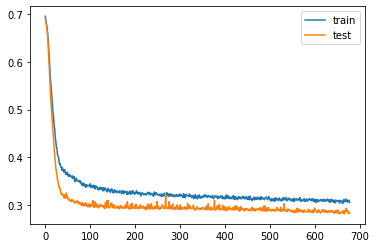

time: 325 ms (started: 2020-12-29 12:46:30 +00:00)


In [103]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

##Akurasi

Data Test

In [171]:
preds = model.predict(X_test_reshaped)
preds = np.round(preds, 0).reshape(preds.shape[0])
acc = accuracy_score(y_test, preds)
acc

0.8694390715667312

time: 247 ms (started: 2020-12-29 13:30:27 +00:00)


Data Train

In [172]:
preds = model.predict(X_train_reshaped)
preds = np.round(preds, 0).reshape(preds.shape[0])
acc = accuracy_score(y_train, preds)
acc

0.8769751693002258

time: 109 ms (started: 2020-12-29 13:30:28 +00:00)
